# <center>Random Under-sampling</center>

## Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

plt.style.use("dark_background")

%matplotlib inline

---

## Create Data

In [17]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_redundant=0,
        n_clusters_per_class=1,
        weights=[0.99],
        class_sep= sep,# how separate the classes are
        random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

0    983
1     17
Name: count, dtype: int64


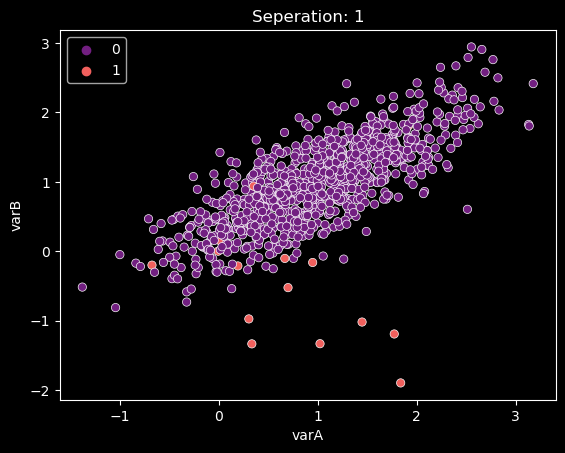

0    983
1     17
Name: count, dtype: int64


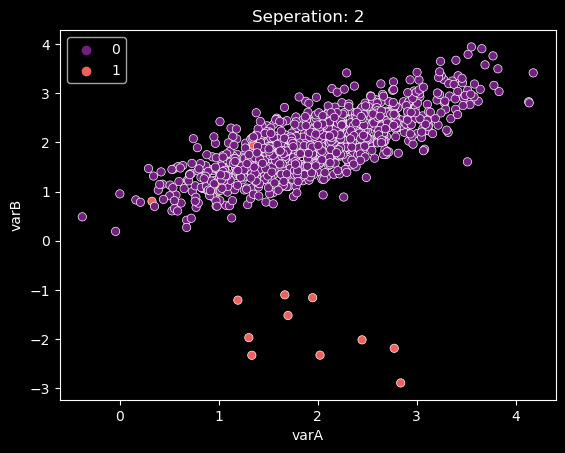

0    983
1     17
Name: count, dtype: int64


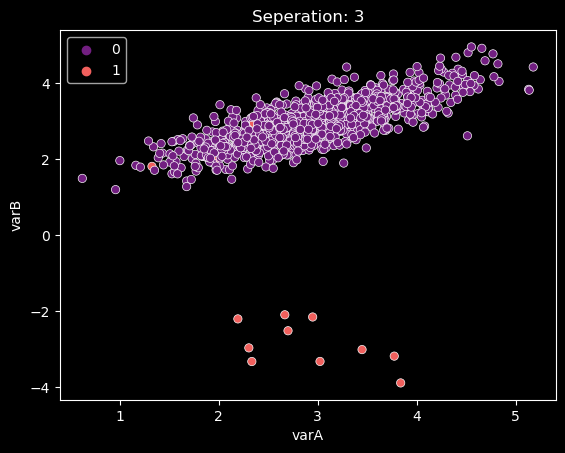

In [18]:
# make datasets with different class separation and plot

for sep in range(1, 4):
    
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data = X,
        x = "varA",
        y = "varB",
        palette= "magma", 
        hue = y
    )
    plt.title(f"Seperation: {sep}")
    plt.show();

<blockquote>As we increase the parameter sep, the minority and majority class show less degree of overlap.</blockquote>

## Random Under Sampling

In [19]:
# Create data

X, y = make_data(sep = 2)

# Set up random sampling class

rus = RandomUnderSampler(
    sampling_strategy = 0.2,
    random_state = 42,
    replacement = True
)

X_resampled, y_resampled = rus.fit_resample(X, y)

In [20]:
# Size of the original data

X.shape, y.shape

((1000, 2), (1000,))

In [21]:
# Size of the resampled data

X_resampled.shape, y_resampled.shape

((102, 2), (102,))

In [22]:
# of minority class observations

y.value_counts()

0    983
1     17
Name: count, dtype: int64

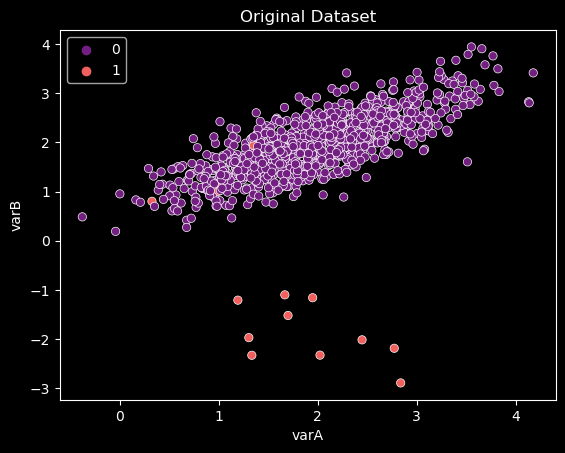

In [23]:
# Plot of the original data

sns.scatterplot(
    data = X,
    x = "varA",
    y = "varB",
    hue = y,
    palette= "magma"
)
plt.title("Original Dataset"),
plt.show();

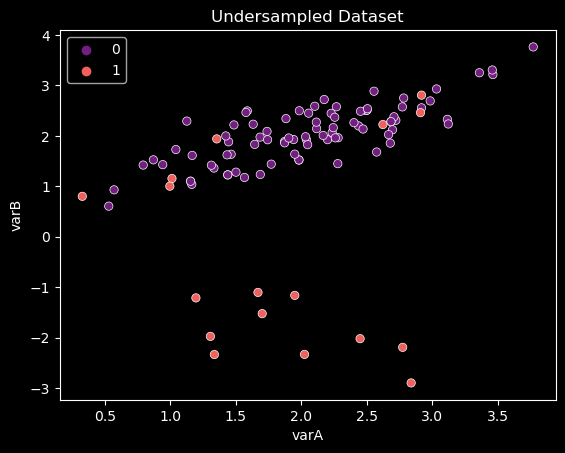

In [24]:
# Plot Under-sampled dataset

sns.scatterplot(
    data = X_resampled,
    x = "varA",
    y = "varB",
    hue = y_resampled,
    palette= "magma"
)
plt.title("Undersampled Dataset")
plt.show();

<blockquote>The samples show a similar observation as they do in the original dataset. 

This is the product of removing data at random.</blockquote>

---

## Load dataset

In [25]:
data = pd.read_csv("../kdd2004.csv")

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [26]:
data.shape

(145751, 75)

In [27]:
# Imbalanced Target
data["target"].value_counts(normalize = True)

target
-1    0.991108
 1    0.008892
Name: proportion, dtype: float64

### Train-Test Split

In [29]:
# Seperate dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels = ["target"], axis = 1),
    data["target"],
    test_size = 0.3,
    random_state = 40
)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

### Random Under-sampling

In [30]:
rus = RandomUnderSampler(
    sampling_strategy = "auto",
    random_state = 39,
    replacement = True
)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [31]:
# Size of the undersampled data
X_resampled.shape, y_resampled.shape

((1808, 74), (1808,))

In [33]:
# number of observations in the positive class in the original dataset
y_train.value_counts()

target
-1    101121
 1       904
Name: count, dtype: int64

In [35]:
# Final data size has 2 times as many observations with the positive class:
y_train.value_counts()[1]*2

1808

### Plot Data

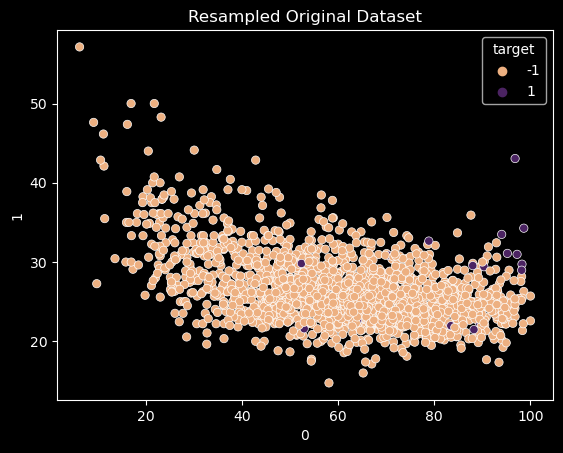

In [45]:
sns.scatterplot(
    data = data.sample(1808, random_state= 38),
    x = "0",
    y = "1",
    hue = "target",
    palette= "flare"
)
plt.title("Resampled Original Dataset");

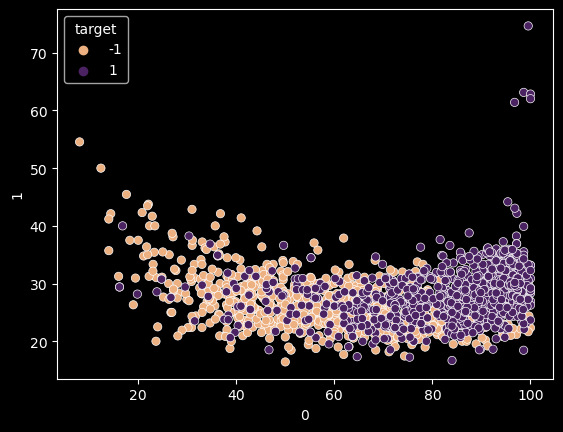

In [48]:
col_names = [str(i) for i in range(74)] + ["target"]

data_resampled = pd.concat([X_resampled, y_resampled], axis = 1)
data_resampled.columns = col_names

sns.scatterplot(
    data = data_resampled,
    x = "0",
    y = "1",
    hue = "target",
    palette= "flare"
);

<blockquote>The distribution is similar to that of the original dataset.
<br>Many observations from the majority class were removed.
<br>This is the reason the purple observations from the minority class have become more visible.
<br>This is the key characteristic of random under-sampling.<br>Random under-sampling preserves the original distributions.</blockquote>

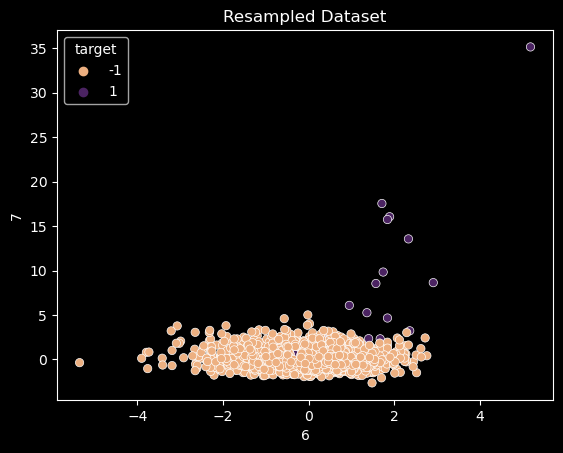

In [59]:
sns.scatterplot(
    data= data.sample(1808, random_state= 38),
    x = "6",
    y = "7",
    hue = "target",
    palette= "flare"
)
plt.title("Resampled Dataset");

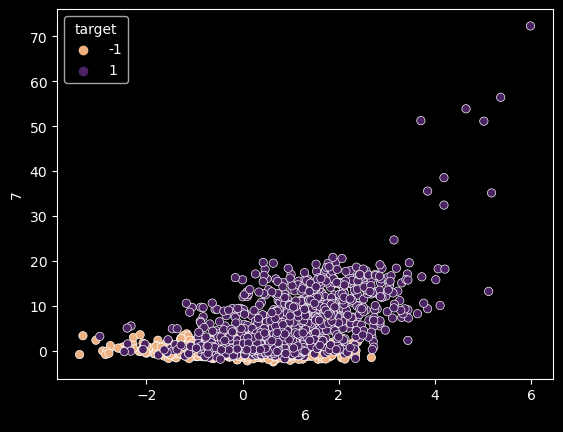

In [54]:
sns.scatterplot(
    data = data_resampled,
    x = "6",
    y = "7",
    hue = "target",
    palette = "flare"
);

### Machine Learning Model Performance Comparison
Comparing machine learning performance with and without under-sampling.

In [56]:
# Function to train Random Forest and evaluate performance

def run_randomforest(X_train, X_test,y_train, y_test):
    rf = RandomForestClassifier(
        n_estimators = 200,
        random_state = 23,
        max_depth = 4
    )
    rf.fit(X_train, y_train)
    
    print("Training set")
    pred = rf.predict_proba(X_train)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_train, pred[:,1])))
    
    print("Test set")
    pred = rf.predict_proba(X_test)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_test, pred[:, 1])))
    

In [57]:
# Evaluate the performance of Random Forest algorithm built utilizing the imbalanced dataset

run_randomforest(X_train,
                 X_test,
                 y_train,
                 y_test
                 )

Training set
Random Forests roc-auc: 0.9746045940056218
Test set
Random Forests roc-auc: 0.9760009579130493


In [58]:
# Evaluate performance of algorithm built utilizing the under-sampled dataset

run_randomforest(X_resampled,
                 X_test,
                 y_resampled,
                 y_test
                 )

Training set
Random Forests roc-auc: 0.9942940422116063
Test set
Random Forests roc-auc: 0.9872672092328878


<blockquote>There is a large increase in performance from utilizing the under-sampled dataset.</blockquote>